In [1]:
import numpy as np
import pandas as pd

#### Timestamp Object
Time stamps refer particular moments in time (eg. Oct 19,2024 at 02:59:48 pm)

#### Creating Timestamp Objects

In [2]:
pd.Timestamp('2024/4/17') #yyyy-month-date

Timestamp('2024-04-17 00:00:00')

In [3]:
type(pd.Timestamp('2024/4/17'))

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
pd.Timestamp('2024-4-17')

Timestamp('2024-04-17 00:00:00')

In [6]:
pd.Timestamp('2024 ,4 ,17')

Timestamp('2024-04-17 00:00:00')

In [7]:
pd.Timestamp('2024')

Timestamp('2024-01-01 00:00:00')

In [8]:
pd.Timestamp('5th April 2025')

Timestamp('2025-04-05 00:00:00')

In [13]:
pd.Timestamp('5th April 2025 9:25 pm')

Timestamp('2025-04-05 21:25:00')

In [14]:
# Using datetime.datetime object of python
import datetime as dt
dt.datetime(2024,12,24,21,39,10)

datetime.datetime(2024, 12, 24, 21, 39, 10)

In [16]:
x = pd.Timestamp(dt.datetime(2024,12,24,21,39,10))

In [17]:
x

Timestamp('2024-12-24 21:39:10')

In [19]:
print(x.year)
print(x.month)
print(x.day)
print(x.hour)
print(x.minute)
print(x.second)

2024
12
24
21
39
10


##### Why separate objects to handle data and time when python already has datetime functionality?
- Syntax-wise datetime(Python) is very convenient
- But the performance takes a hit while working with huge data. Like: List vs Numpy
- The weakness of Python's datetime format inspired the Numpy team to add a set of native time series data type to Numpy
- The datetime64 dtype encodes data as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [23]:
import numpy as np
date = np.array('2019-12-24',dtype=np.datetime64)
date

array('2019-12-24', dtype='datetime64[D]')

In [25]:
date+np.arange(12) #Vectorised operation

array(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
       '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31',
       '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04'],
      dtype='datetime64[D]')

##### 
- Because of the uniform type in Numpy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large.
- Pandas timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64
- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame 

#### DatetimeIndex Objects
A collection of pandas timestamp

In [31]:
# from strings
pd.DatetimeIndex(['2023/1/2','2024/1/1','2021/12/31'])

DatetimeIndex(['2023-01-02', '2024-01-01', '2021-12-31'], dtype='datetime64[ns]', freq=None)

In [32]:
type(pd.DatetimeIndex(['2023/1/2','2024/1/1','2021/12/31']))

pandas.core.indexes.datetimes.DatetimeIndex

In [33]:
pd.DatetimeIndex(['2023/1/2','2024/1/1','2021/12/31'])[0]

Timestamp('2023-01-02 00:00:00')

In [34]:
pd.DatetimeIndex(['2023/1/2','2024/1/1','2021/12/31'])[2]

Timestamp('2021-12-31 00:00:00')

In [42]:
# 1 single date ko store karne ke liye pd.Timestamp, multiple dates ko store karne ke liye pd.DatetimeIndex use

In [43]:
# Using Python datetime object
pd.DatetimeIndex([dt.datetime(2023,11,1),dt.datetime(2024,2,2),dt.datetime(2043,2,3)])

DatetimeIndex(['2023-11-01', '2024-02-02', '2043-02-03'], dtype='datetime64[ns]', freq=None)

In [44]:
# Using pd.Timestamp object
pd.DatetimeIndex([pd.Timestamp(2023,11,1),pd.Timestamp(2024,2,2),pd.Timestamp(2043,2,3)])

DatetimeIndex(['2023-11-01', '2024-02-02', '2043-02-03'], dtype='datetime64[ns]', freq=None)

In [45]:
dt_index=pd.DatetimeIndex([pd.Timestamp(2023,11,1),pd.Timestamp(2024,2,2),pd.Timestamp(2043,2,3)])

In [46]:
pd.Series([1,2,3],index=dt_index)

2023-11-01    1
2024-02-02    2
2043-02-03    3
dtype: int64

#### date_range function

In [50]:
pd.date_range(start='2024/1/4',end='2024/2/18',freq='D') # freq='D' -> default

DatetimeIndex(['2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04',
               '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-17', '2024-02-18'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(start='2024/1/4',end='2024/2/18',freq='2D') # 1-1 din chhor ke

DatetimeIndex(['2024-01-04', '2024-01-06', '2024-01-08', '2024-01-10',
               '2024-01-12', '2024-01-14', '2024-01-16', '2024-01-18',
               '2024-01-20', '2024-01-22', '2024-01-24', '2024-01-26',
               '2024-01-28', '2024-01-30', '2024-02-01', '2024-02-03',
               '2024-02-05', '2024-02-07', '2024-02-09', '2024-02-11',
               '2024-02-13', '2024-02-15', '2024-02-17'],
              dtype='datetime64[ns]', freq='2D')

In [52]:
pd.date_range(start='2024/1/4',end='2024/2/18',freq='3D') # 2-2 din chhor ke

DatetimeIndex(['2024-01-04', '2024-01-07', '2024-01-10', '2024-01-13',
               '2024-01-16', '2024-01-19', '2024-01-22', '2024-01-25',
               '2024-01-28', '2024-01-31', '2024-02-03', '2024-02-06',
               '2024-02-09', '2024-02-12', '2024-02-15', '2024-02-18'],
              dtype='datetime64[ns]', freq='3D')

In [54]:
# Business days - Saturday and Sunday hata diya
pd.date_range(start='2024/1/4',end='2024/2/18',freq='B')

DatetimeIndex(['2024-01-04', '2024-01-05', '2024-01-08', '2024-01-09',
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02', '2024-02-05', '2024-02-06',
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16'],
              dtype='datetime64[ns]', freq='B')

In [56]:
# One week per day
pd.date_range(start='2024/1/4',end='2024/2/18',freq='W')

DatetimeIndex(['2024-01-07', '2024-01-14', '2024-01-21', '2024-01-28',
               '2024-02-04', '2024-02-11', '2024-02-18'],
              dtype='datetime64[ns]', freq='W-SUN')

In [58]:
# Bas Thursdays 
pd.date_range(start='2024/1/4',end='2024/2/18',freq='W-THU')

DatetimeIndex(['2024-01-04', '2024-01-11', '2024-01-18', '2024-01-25',
               '2024-02-01', '2024-02-08', '2024-02-15'],
              dtype='datetime64[ns]', freq='W-THU')

In [63]:
# Using periods 
pd.date_range(start='2024/1/4',periods=25,freq='D') # abhi se 25 din dikhao

DatetimeIndex(['2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28'],
              dtype='datetime64[ns]', freq='D')

#### to_datetime function
converts an existing object to pandas timestamp/datetimeindex object

In [65]:
# Simple series example
s = pd.Series(['2023/2/1','2026/2/1','2025/2/1','2024/2/1','2043/2/1'])

In [66]:
s

0    2023/2/1
1    2026/2/1
2    2025/2/1
3    2024/2/1
4    2043/2/1
dtype: object

In [67]:
# find year from the about Series

In [69]:
pd.to_datetime(s)

0   2023-02-01
1   2026-02-01
2   2025-02-01
3   2024-02-01
4   2043-02-01
dtype: datetime64[ns]

In [70]:
pd.to_datetime(s).dt.year  # dt is accessor similar to str which we used

0    2023
1    2026
2    2025
3    2024
4    2043
dtype: int32

In [72]:
pd.to_datetime(s).dt.day_name()

0    Wednesday
1       Sunday
2     Saturday
3     Thursday
4       Sunday
dtype: object

In [73]:
pd.to_datetime(s).dt.month_name()

0    February
1    February
2    February
3    February
4    February
dtype: object

In [75]:
pd.to_datetime(s).dt.month

0    2
1    2
2    2
3    2
4    2
dtype: int32

In [76]:
# with errors
s = pd.Series(['2023/2/1','2026/2/1','2025/2/1','2024/2/1','2043/120/1'])

In [77]:
pd.to_datetime(s)

ValueError: time data "2043/120/1" doesn't match format "%Y/%m/%d", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [78]:
pd.to_datetime(s,errors='coerce')

0   2023-02-01
1   2026-02-01
2   2025-02-01
3   2024-02-01
4          NaT
dtype: datetime64[ns]

#### errors='coerce'

In [80]:
pd.to_datetime(s,errors='coerce').dt.month_name()

0    February
1    February
2    February
3    February
4         NaN
dtype: object

In [83]:
df = pd.read_csv('expense_data.csv')

In [84]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [87]:
pd.to_datetime(df["Date"])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [89]:
df['Date']=pd.to_datetime(df["Date"])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [93]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [94]:
df['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [95]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [96]:
df['Date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

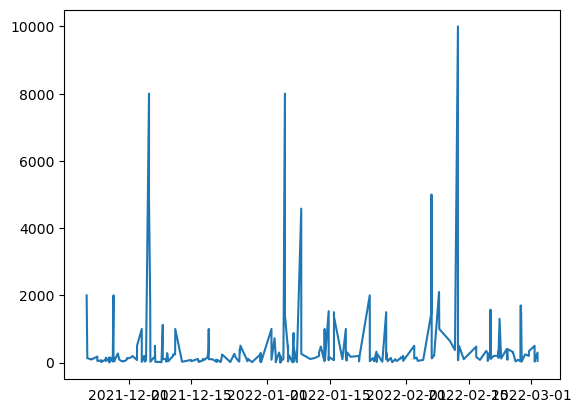

In [97]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [98]:
# day_name wise bar chart/month wise bar chart
df['day_name']=df['Date'].dt.day_name()

In [99]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


In [101]:
df.groupby('day_name')['INR'].sum()

day_name
Friday        6910.00
Monday        6248.95
Saturday     34421.02
Sunday       31542.40
Thursday      9570.51
Tuesday      17344.65
Wednesday     7740.47
Name: INR, dtype: float64

<Axes: xlabel='day_name'>

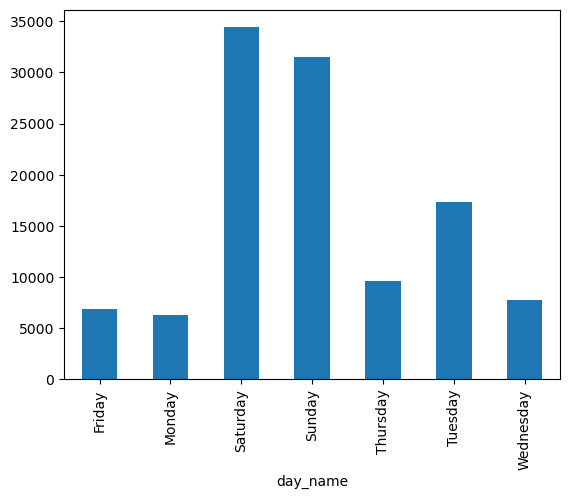

In [102]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')

In [103]:
df['month_name']=df['Date'].dt.month_name()

In [104]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


In [105]:
df.groupby('month_name')['INR'].sum()

month_name
December    28644.44
February    36064.65
January     40320.51
March        1125.00
November     7623.40
Name: INR, dtype: float64

<Axes: xlabel='month_name'>

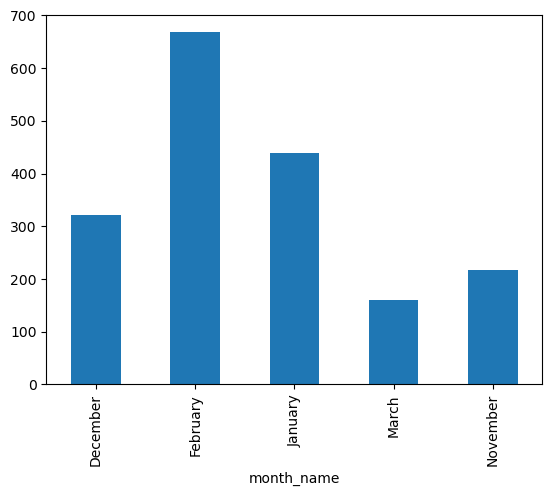

In [107]:
df.groupby('month_name')['INR'].mean().plot(kind='bar')

<Axes: xlabel='day_name'>

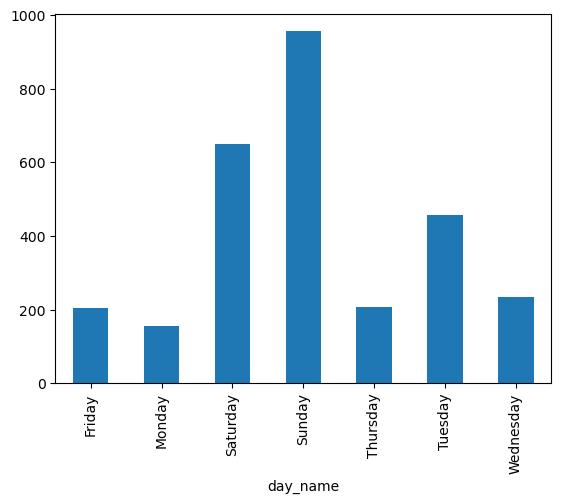

In [108]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [109]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
